<a href="https://colab.research.google.com/github/Mahesha-uop/HealthGuardian-Disease-Risk-Detector-using-h2o-wave/blob/main/train/CVD_Risk_Prediction_H2O_AutoML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 33 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu.com

In [ ]:
# If using google drive to have the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install h2o if haven't installed
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=fffe1f46e07c9521b32f2a26a83ab0fec535a17e4c6a28410b98f710dc177b66
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [ ]:
 # Import necessary libraries from h2o
 import h2o
 from h2o.automl import H2OAutoML

In [ ]:
# Check instance of H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpj8sugorj
  JVM stdout: /tmp/tmpj8sugorj/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpj8sugorj/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_s2la8t
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# Import data in csv as a dataframe
file_path = '/content/drive/MyDrive/Machine Learning/H2O /CVD risk assessment dataset.csv' # Give the file path. In my case google drive
CVD_details_df = h2o.import_file(file_path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Recognize field in csv
CVD_details_df.types

{'id': 'int',
 'age': 'int',
 'gender': 'int',
 'height': 'int',
 'weight': 'real',
 'ap_hi': 'int',
 'ap_lo': 'int',
 'cholesterol': 'int',
 'gluc': 'int',
 'smoke': 'int',
 'alco': 'int',
 'active': 'int',
 'cardio': 'int'}

In [ ]:
# Visualize statics in data file
CVD_details_df.describe()

Rows:70000
Cols:13

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
type,int,int,int,int,real,int,int,int,int,int,int,int,int
mins,0.0,10798.0,1.0,55.0,10.0,-150.0,-70.0,1.0,1.0,0.0,0.0,0.0,0.0
mean,49972.41989999997,19468.86581428572,1.3495714285714278,164.35922857142853,74.20568999999986,128.81728571428556,96.63041428571434,1.3668714285714292,1.2264571428571438,0.08812857142857143,0.053771428571428574,0.8037285714285715,0.4997
maxs,99999.0,23713.0,2.0,250.0,200.0,16020.0,11000.0,3.0,3.0,1.0,1.0,1.0,1.0
sigma,28851.30232317292,2467.2516672413994,0.4768380155828635,8.210126364538025,14.39575667851138,154.01141945609137,188.47253029639026,0.6802503486993808,0.5722702766138448,0.28348381676993517,0.22556770360410489,0.3971790635049283,0.5000034814661862
zeros,1,0,0,0,0,0,21,0,0,63831,66236,13739,35021
missing,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.0,18393.0,2.0,168.0,62.0,110.0,80.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,20228.0,1.0,156.0,85.0,140.0,90.0,3.0,1.0,0.0,0.0,1.0,1.0
2,2.0,18857.0,1.0,165.0,64.0,130.0,70.0,3.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
# Split into train, validation and test data
CVD_data_train, CVD_data_test, CVD_data_valid = CVD_details_df.split_frame(ratios=[.8, .12])

In [ ]:
# Visualize train data
CVD_data_train.head()

id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62,110,80,1,1,0,0,1,0
1,20228,1,156,85,140,90,3,1,0,0,1,1
3,17623,2,169,82,150,100,1,1,0,0,1,1
4,17474,1,156,56,100,60,1,1,0,0,0,0
8,21914,1,151,67,120,80,2,2,0,0,0,0
9,22113,1,157,93,130,80,3,1,0,0,1,0
13,17668,1,158,71,110,70,1,1,0,0,1,0
14,19834,1,164,68,110,60,1,1,0,0,0,0
15,22530,1,169,80,120,80,1,1,0,0,1,0
18,14791,2,165,60,120,80,1,1,0,0,0,0


In [ ]:
# Take necessary fields as x and y
y = "cardio"
x = CVD_details_df.columns
x.remove(y)
x.remove("id")

In [ ]:
# Train 10 models eliminating StackedEnsemble, DeepLearning
auto_ml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [ ]:
# Train the model
auto_ml.train(x = x, y = y, training_frame = CVD_data_train, validation_frame= CVD_data_valid)

AutoML progress: |
19:31:05.246: Project: AutoML_1_20240219_193105
19:31:05.247: Cross-validation disabled by user: no fold column nor nfolds > 1.
19:31:05.247: Setting stopping tolerance adaptively based on the training frame: 0.004222718446862334
19:31:05.247: Build control seed: 10
19:31:05.248: training frame: Frame key: AutoML_1_20240219_193105_training_py_2_sid_a499    cols: 13    rows: 56081  chunks: 8    size: 822546  checksum: -7956556620632203696
19:31:05.248: validation frame: Frame key: py_4_sid_a499    cols: 13    rows: 5605  chunks: 8    size: 84711  checksum: 1224335787674609098
19:31:05.248: leaderboard frame: Frame key: py_4_sid_a499    cols: 13    rows: 5605  chunks: 8    size: 84711  checksum: 1224335787674609098
19:31:05.249: blending frame: NULL
19:31:05.249: response column: cardio
19:31:05.249: fold column: null
19:31:05.249: weights column: null
19:31:05.268: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w

,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,50.0,50.0,59516.0,7.0,7.0,7.0,44.0,119.0,90.12
,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2024-02-19 19:31:36,0.004 sec,0.0,0.4999987,0.4999974,0.2499987,0.5000330,0.5000317,0.2500330
,2024-02-19 19:31:36,0.474 sec,5.0,0.4540925,0.4460999,0.2062000,0.4574372,0.4491797,0.2092488
,2024-02-19 19:31:37,0.880 sec,10.0,0.4364042,0.4174210,0.1904486,0.4423828,0.4228207,0.1957026
,2024-02-19 19:31:37,1.278 sec,15.0,0.4273746,0.3974247,0.1826491,0.4357489,0.4049185,0.1898771
,2024-02-19 19:31:38,1.754 sec,20.0,0.4216325,0.3805098,0.1777740,0.4317334,0.3895568,0.1863937
,2024-02-19 19:31:38,2.356 sec,25.0,0.4185513,0.3691914,0.1751852,0.4300817,0.3794513,0.1849703
,2024-02-19 19:31:39,2.906 sec,30.0,0.4169642,0.3629686,0.1738592,0.4295810,0.3741790,0.1845398
,2024-02-19 19:31:39,3.476 sec,35.0,0.4156841,0.3581774,0.1727933,0.4294657,0.3704096,0.1844408


In [ ]:
# Get leader board to analysis performance of models
lb = auto_ml.leaderboard

In [ ]:
lb.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_2_AutoML_1_20240219_193105,0.429801,0.184729,0.365737,0.3001,0.184729
GBM_3_AutoML_1_20240219_193105,0.430213,0.185083,0.36582,0.300322,0.185083
XGBoost_3_AutoML_1_20240219_193105,0.430251,0.185116,0.363874,0.300304,0.185116
GBM_1_AutoML_1_20240219_193105,0.431763,0.186419,0.367042,0.301469,0.186419
GBM_4_AutoML_1_20240219_193105,0.432531,0.187083,0.366437,0.30166,0.187083
XRT_1_AutoML_1_20240219_193105,0.433832,0.18821,0.379642,0.303181,0.18821
DRF_1_AutoML_1_20240219_193105,0.437044,0.191008,0.367867,0.304787,0.191008
XGBoost_2_AutoML_1_20240219_193105,0.440316,0.193878,0.365802,0.306596,0.193878
XGBoost_1_AutoML_1_20240219_193105,0.452756,0.204988,0.371714,0.31466,0.204988
GLM_1_AutoML_1_20240219_193105,0.472358,0.223122,0.447504,0.329942,0.223122


In [ ]:
# Predictions
CVD_pred = auto_ml.leader.predict(CVD_data_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
CVD_pred.head()

predict
0.715294
0.753954
0.259143
0.500102
0.543172
0.1145
0.291172
0.464829
0.473906
0.294014


In [ ]:
# Best model for predictions
auto_ml.leader.model_performance(CVD_data_test)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.18159618649329531
RMSE: 0.426141040611316
MAE: 0.3621918019786763
RMSLE: 0.29937556253432535
Mean Residual Deviance: 0.18159618649329531

In [ ]:
# Get model ids
model_ids = list(auto_ml.leaderboard['model_id'].as_data_frame().iloc[:,0])

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [ ]:
model_ids

['GBM_2_AutoML_1_20240219_193105',
 'GBM_3_AutoML_1_20240219_193105',
 'XGBoost_3_AutoML_1_20240219_193105',
 'GBM_1_AutoML_1_20240219_193105',
 'GBM_4_AutoML_1_20240219_193105',
 'XRT_1_AutoML_1_20240219_193105',
 'DRF_1_AutoML_1_20240219_193105',
 'XGBoost_2_AutoML_1_20240219_193105',
 'XGBoost_1_AutoML_1_20240219_193105',
 'GLM_1_AutoML_1_20240219_193105']

In [ ]:
# Get the output model
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

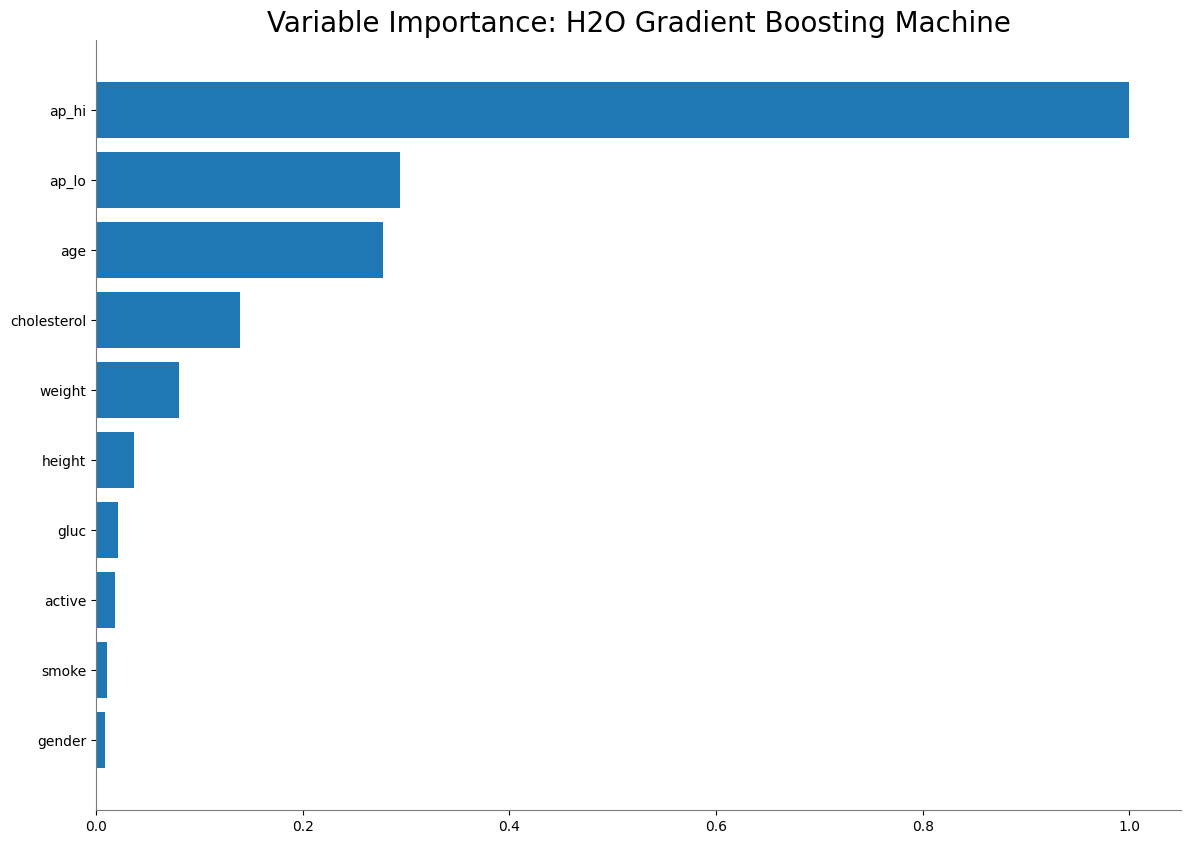

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot varible importance
out_gbm.varimp_plot()

In [ ]:
# Save the best model as a mojo
auto_ml.leader.download_mojo(path = "/content/drive/MyDrive/Machine Learning/CVD")

'/content/drive/MyDrive/Machine Learning/CVD'